# Linear Regression Exercises

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
!pip install scikit-learn==1.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 39.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


## Running Gradient Descent on Cost Function of Univariate Linear Regression

### Mean Squared Error: a cost function for regression problems

### $$MSE = \frac{1}{2n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1.x^{(i)} \big)^2 $$


### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

In [ ]:
#Real data for x and y (dataset with n=7)
x_i = [0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]
y_i = [1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]

#Making data for theta_0 and theta_1
th_0 = np.linspace(start=-1, stop=3, num=200)
th_1 = np.linspace(start=-1, stop=3, num=200)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

In [ ]:
#The cost function - MSE
def mse(theta_0,theta_1):
    total=0
    for j in range(len(x_i)):
        total+=(y_i[j]-theta_0-theta_1*x_i[j])**2
    return total/(2*len(x_i))

#Partial derivative wrt theta_0
def pdtheta_0(theta_1,theta_0):
    total=0
    for j in range(len(x_i)):
        total+=y_i[j]-theta_0-theta_1*x_i[j]
    return total/(-len(x_i))

#Partial derivative wrt theta_1
def pdtheta_1(theta_1,theta_0):
    total=0
    for j in range(len(x_i)):
        total+=(y_i[j]-theta_0-theta_1*x_i[j])*x_i[j]
    return total/(-len(x_i))

In [ ]:
#Gradient descent implementation
learning_rate = 0.01
max_iter = 200
initial_theta_0 = 1
initial_theta_1= 1

theta_0_old=initial_theta_0
theta_1_old=initial_theta_1

theta_0_list=[]
theta_1_list=[]
for i in range (1,max_iter+1):
    theta_0_new = theta_0_old - learning_rate * pdtheta_0(theta_0_old,theta_1_old)
    theta_1_new = theta_1_old - learning_rate * pdtheta_1(theta_0_old,theta_1_old)

    theta_0_list.append(theta_0_old)
    theta_1_list.append(theta_1_old)

    theta_0_old=theta_0_new
    theta_1_old=theta_1_new

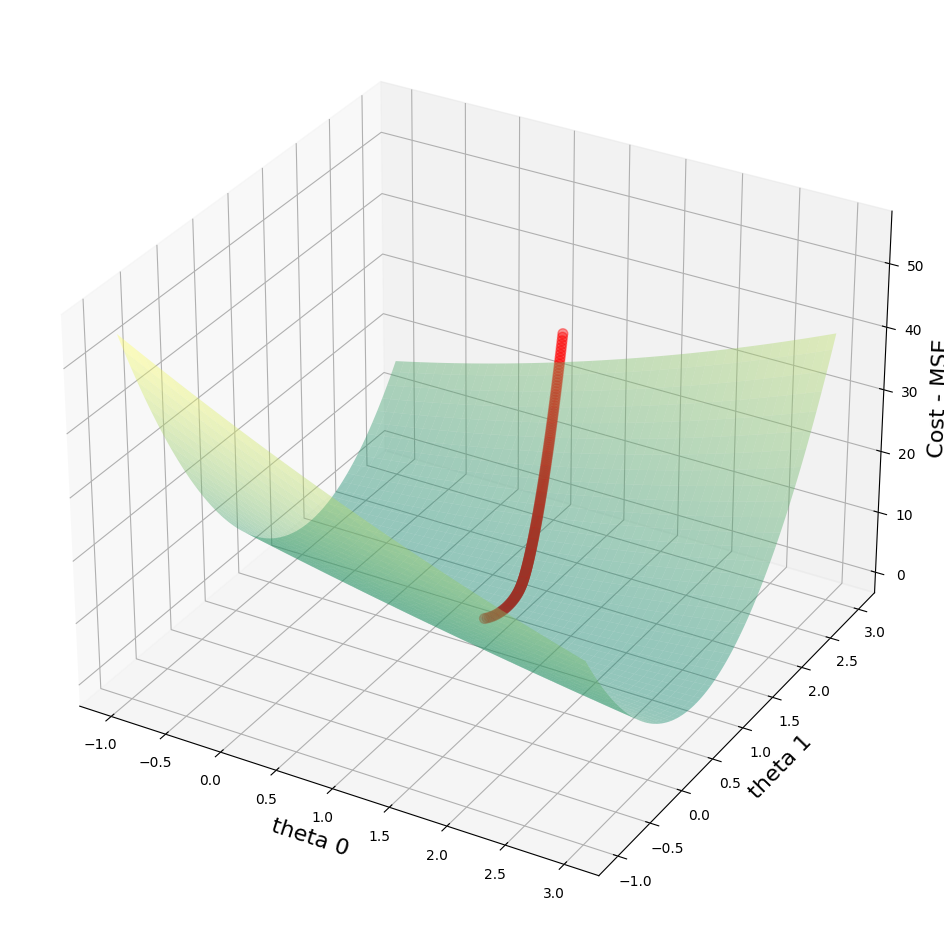

In [ ]:
#Plotting a 3D graph
fig=plt.figure(figsize=[16,12])
ax=plt.axes(projection='3d')
ax.set_xlabel('theta 0', fontsize=16)
ax.set_ylabel('theta 1', fontsize=16)
ax.set_zlabel('Cost - MSE', fontsize=16)
ax.plot_surface(plot_t0, plot_t1, mse(plot_t0, plot_t1), alpha=0.4, cmap='summer')
#The cost function - MSE
def mse(theta_0,theta_1):
    total=0
    for j in range(len(x_i)):
        total+=(y_i[j]-theta_0-theta_1*x_i[j])**2
    return total/(len(x_i))
ax.scatter(theta_0_list,theta_1_list,mse(np.array(theta_0_list),np.array(theta_1_list)), alpha=0.4, s=50, color='red')
plt.show()

## Problem 2: Making Predictions using the Movie Revenue Dataset
### An Example of Univariate Linear Regression

In [ ]:
#Loading cleaned/ preprocessed movie revenue dataset from csv
data=pd.read_csv('/content/drive/MyDrive/ML_PP/PP1/D1_Movie_Revenue_Dataset_Clean.csv')
data

,Production_Budget,Worldwide_Gross
0,14000000,1000000
1,7000000,1000000
2,1000000,1000000
3,1700000,1000915
4,800000,1001437
...,...,...
5524,70000000,99112101
5525,5000000,99147
5526,75000000,99215042
5527,36000000,99967670


In [ ]:
#Separating the feature into variable X
X=data['Production_Budget'] #extracts column as a series
type(X)
X=data[['Production_Budget']] #extracts column as a dataframe
type(X)

pandas.core.frame.DataFrame

In [ ]:
#Separating the target into variable Y
Y=data[['Worldwide_Gross']]
type(Y)

pandas.core.frame.DataFrame

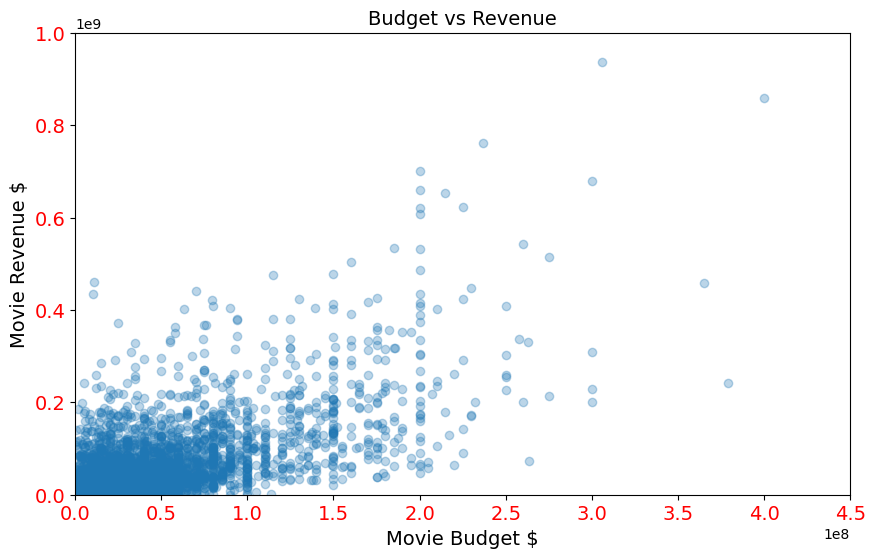

In [ ]:
#Visualizing Data
plt.figure(figsize=(10,6))
plt.scatter(X,Y,alpha=0.3) #alpha sets transparency of dots
plt.title('Budget vs Revenue',fontsize=14)
plt.xlabel('Movie Budget $',fontsize=14)
plt.ylabel('Movie Revenue $',fontsize=14)
plt.xticks(color='red',fontsize=14)
plt.yticks(color='red',fontsize=14)
plt.xlim(0,450000000)
plt.ylim(0,1000000000)
plt.show()

In [ ]:
#Fitting Linear Regression Model
r=LinearRegression() #Creates an object of LinearRegression type
r.fit(X,Y) #Does the training to select optimal values of the parameters

LinearRegression()

In [ ]:
#Reading values for parameters theta_0 and theta_1

#theta_0
t0=r.intercept_[0]
#theta_1
t1=r.coef_[0][0]
print('theta_0:',t0)
print('theta_1:',t1)
print(mse(t0,t1))
print(mse(theta_0_new,theta_1_new))

theta_0: 7335134.926907375
theta_1: 1.140725041507312
53804187975340.016
32.520011745293786


In [ ]:
#Reading R-square value (the goodness of fit)
r.score(X,Y)

0.4664379717198962

In [ ]:
#Making predictions

#Approach 1: Using the equation of linear regression
y=t0+t1*5000000
print('Prediction 1:',y)

#Approach 2: Using the predict method
y=r.predict(pd.DataFrame([5000000]))
print('Prediction 2:',y)

Prediction 1: 13038760.134443935
Prediction 2: [[13038760.13444394]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  # no feature names seen in fit and in X


In [ ]:
#Making predictions for the whole dataset
y=r.predict(X)

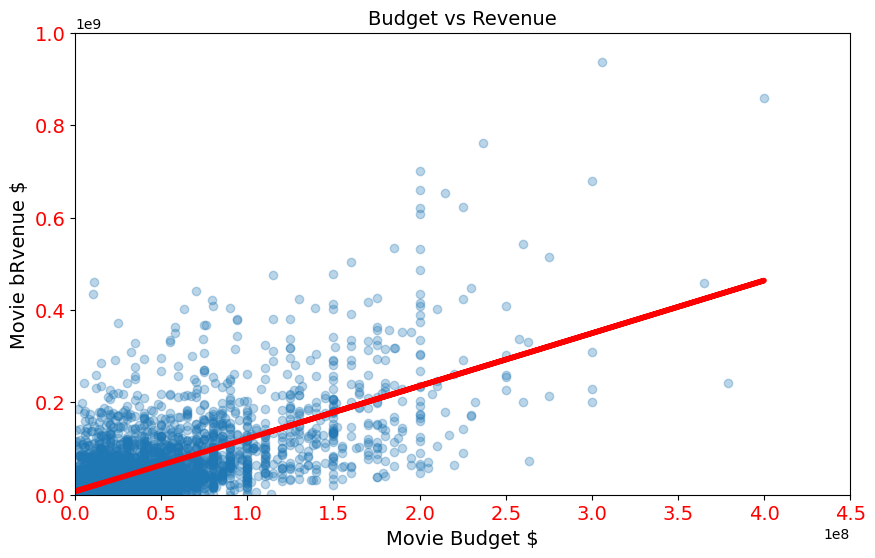

In [ ]:
##Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,Y,alpha=0.3)
plt.title('Budget vs Revenue',fontsize=14)
plt.xlabel('Movie Budget $',fontsize=14)
plt.ylabel('Movie bRvenue $',fontsize=14)
plt.xticks(color='red',fontsize=14)
plt.yticks(color='red',fontsize=14)
plt.xlim(0,450000000)
plt.ylim(0,1000000000)
plt.plot(X,r.predict(X),color='red',linewidth=4)
plt.show()

### An Altenate Model
### Applying Data Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size=0.2,random_state=0)
print('Size of original dataset (complete):',len(X))
print('Size of train dataset (80%):',len(X_train))
print('Size of test dataset (20%):',len(X_test))

Size of original dataset (complete): 5529
Size of train dataset (80%): 4423
Size of test dataset (20%): 1106


In [ ]:
#Let us now fit the model on train data and then check the r_squared value of both train and test sets
r2=LinearRegression()
r2.fit(X_train,Y_train)
# creating object
stand= StandardScaler()
# fit data
Fit= stand.fit(X_train)
# transform data
x_scaled = Fit.transform(X_train)
print(r2.score(x_scaled,Y_train))
print(r2.score(X_test,Y_test))
#print('testing on testdata: ',r2.predict(X_test),r2.score(X_test,Y_test),'testing on train data:',r2.predict(X_train),r2.score(X_train,Y_train),sep='\n')

0.4658557694041633
0.46844519402314944


## Polynomial Regression

In [ ]:
deg=2 #try 3
X_train_poly1=PolynomialFeatures(degree=deg).fit_transform(X_train)
X_train_poly1=pd.DataFrame(X_train_poly1)
X_train_poly1=X_train_poly1.drop([0],axis=1)
model=LinearRegression()
model.fit(X_train_poly1,Y_train)

print('Training data r-square:', model.score(X_train_poly1, Y_train))
X_test_poly1=PolynomialFeatures(degree=deg).fit_transform(X_test)
X_test_poly1=pd.DataFrame(X_test_poly1)
X_test_poly1=X_test_poly1.drop([0],axis=1)
y_pred_poly1=model.predict(X_test_poly1)
print('Test data r-square:', model.score(X_test_poly1, Y_test))
print('Number of non-zero features:',np.sum(model.coef_ != 0))
#print('r- square of actual vs predicted',model.score(Y_test,y_pred_poly))

Training data r-square: 0.4714359341725455
Test data r-square: 0.46947914947387104
Number of non-zero features: 2


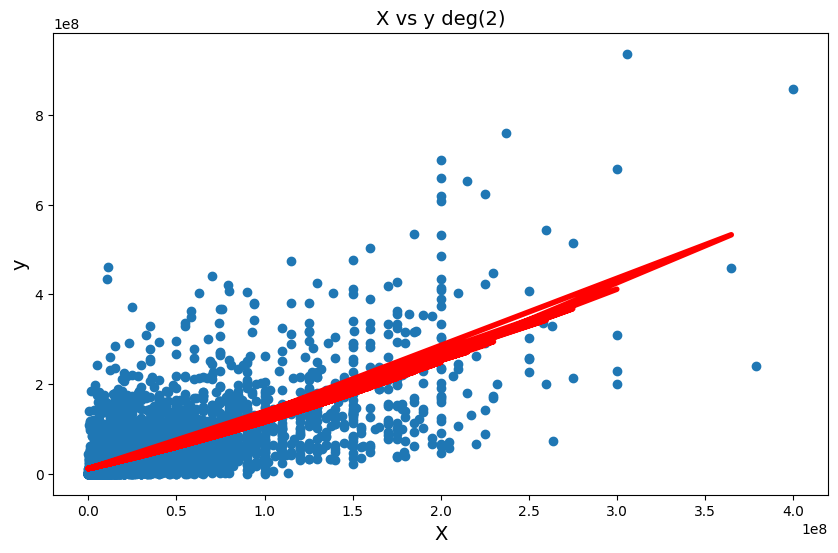

In [ ]:
#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.title('X vs y deg(2)',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.plot(X_test,model.predict(X_test_poly1),color='red',linewidth=4)
plt.show()

In [ ]:
deg=3 #try 3
X_train_poly=PolynomialFeatures(degree=deg).fit_transform(X_train)
X_train_poly=pd.DataFrame(X_train_poly)
X_train_poly=X_train_poly.drop([0],axis=1)
model3=LinearRegression()
model3.fit(X_train_poly,Y_train)

print('Training data r-square:', model3.score(X_train_poly, Y_train))
X_test_poly=PolynomialFeatures(degree=deg).fit_transform(X_test)
X_test_poly=pd.DataFrame(X_test_poly)
X_test_poly=X_test_poly.drop([0],axis=1)
y_pred_poly=model3.predict(X_test_poly)
print('Test data r-square:', model3.score(X_test_poly, Y_test))
print('Number of non-zero features:',np.sum(model3.coef_ != 0))
#print('r- square of actual vs predicted',model.score(Y_test,y_pred_poly))

Training data r-square: 0.4446179844303847
Test data r-square: 0.4500326351732159
Number of non-zero features: 3


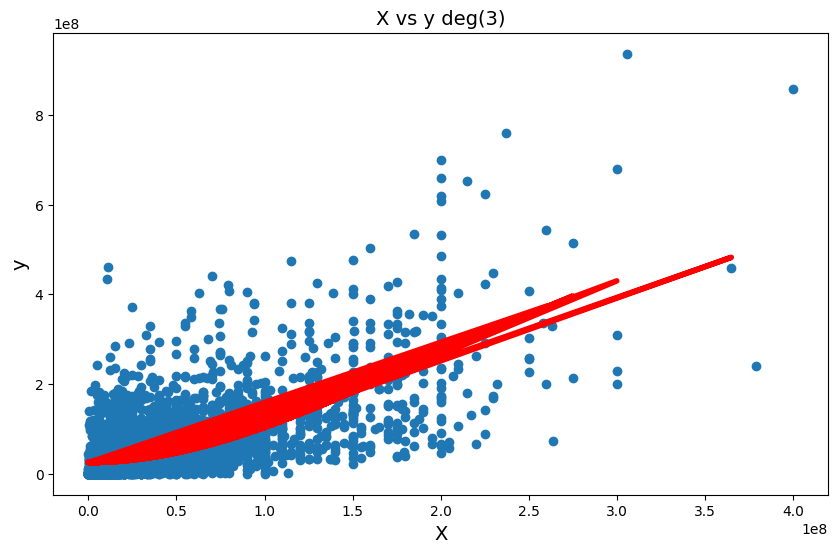

In [ ]:
#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,Y)
plt.title('X vs y deg(3)',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.plot(X_test,model3.predict(X_test_poly),color='red',linewidth=4)
plt.show()

In [ ]:
import pickle
pickle.dump(r2, open('/content/drive/MyDrive/MovieRev/lin_reg_model_movierev', 'wb'))
pickle.dump(model, open('/content/drive/MyDrive/MovieRev/poly2_reg_model_movierev', 'wb'))
pickle.dump(model3, open('/content/drive/MyDrive/MovieRev/poly3_reg_model_movierev', 'wb'))

In [ ]:
np.save('/content/drive/MyDrive/MovieRev/xtrain',X_train)
np.save('/content/drive/MyDrive/MovieRev/xtest',X_test)
np.save('/content/drive/MyDrive/MovieRev/ytrain',Y_train)
np.save('/content/drive/MyDrive/MovieRev/xtest',Y_test)
np.save('/content/drive/MyDrive/MovieRev/xtrainpoly2',X_train_poly1)
np.save('/content/drive/MyDrive/MovieRev/xtestpoly2',X_test_poly1)
np.save('/content/drive/MyDrive/MovieRev/xtrainpoly3',X_train_poly)
np.save('/content/drive/MyDrive/MovieRev/xtestpoly3',X_test_poly)

